<a href="https://colab.research.google.com/github/inside-river/Prog2_11th/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最小二乗法のプログラム

x座標を入力せよ
x座標 : 6.60
x座標を入力せよ
x座標 : 7.00
x座標を入力せよ
x座標 : 7.60
x座標を入力せよ
x座標 : 9.20
x座標を入力せよ
x座標 : 11.7
x座標を入力せよ
x座標 : 13.2
x座標を入力せよ
x座標 : 14.7
x座標を入力せよ
x座標 : stop
y座標を入力せよ
y座標16.8
y座標を入力せよ
y座標18.2
y座標を入力せよ
y座標19.2
y座標を入力せよ
y座標23.5
y座標を入力せよ
y座標30.4
y座標を入力せよ
y座標30.9
y座標を入力せよ
y座標33.3
X = [6.6, 7.0, 7.6, 9.2, 11.7, 13.2, 14.7]
Y = [16.8, 18.2, 19.2, 23.5, 30.4, 30.9, 33.3]
a = 2.10 ± 0.10
b = 3.63 ± 1.09


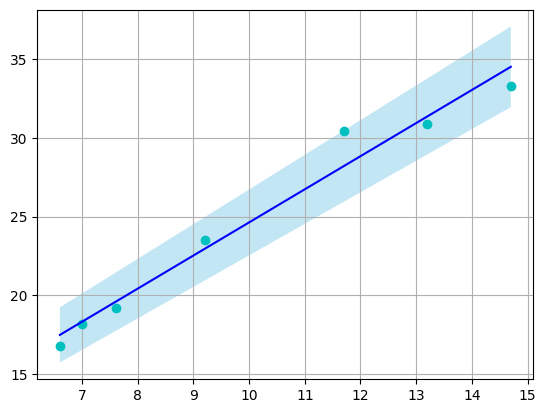

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

#データｘ
#X=[6.60 , 7.00 , 7.60 , 9.20 , 11.7 , 13.2 , 14.7]
#データｙ
#Y=[16.8 , 18.2 , 19.2 , 23.5 , 30.4 , 30.9 , 33.3]

X=[]
Y=[]
while True:
  print('x座標を入力せよ')
  x_data=input('x座標 : ')
  if x_data=='stop':
    break
  x_data=float(x_data)
  X.append(x_data)
while len(Y)!=len(X):
  print('y座標を入力せよ')
  y_data=float(input('y座標'))
  if y_data=='stop':
    break
  Y.append(y_data)
print('X =',X)
print('Y =',Y)

X_sum=np.cumsum(X)[len(X)-1]
X_sum_2=X_sum**2
Y_sum=np.cumsum(Y)[len(Y)-1]

X_2=np.array(X)**2
X_2_sum=np.cumsum(X_2)[len(X_2)-1]

X_Y=np.array(X)*np.array(Y)
X_Y_sum=np.cumsum(X_Y)[len(X_Y)-1]

a=(len(X) * X_Y_sum - X_sum * Y_sum)/(len(X) * X_2_sum - X_sum_2)

b=(X_2_sum * Y_sum - X_sum * X_Y_sum)/(len(X) * X_2_sum - X_sum_2)

aX_b = a * np.array(X) + b

Y__aX_b = np.array(Y) - aX_b
Y__aX_b__2 = Y__aX_b **2
Y__aX_b__2_sum = np.cumsum(Y__aX_b__2)[len(Y__aX_b__2)-1]

s_2_y = Y__aX_b__2_sum / (len(Y__aX_b__2)-2)

e_a = 0.6745 * (s_2_y * len(X) / (len(X) * X_2_sum - X_sum_2)) **(1/2)
e_b = 0.6745 * (s_2_y * X_2_sum / (len(X) * X_2_sum - X_sum_2)) **(1/2)

D_a = Decimal(str(a)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_b = Decimal(str(b)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_e_a = Decimal(str(e_a)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)
D_e_b = Decimal(str(e_b)).quantize(Decimal('0.01'),rounding=ROUND_HALF_UP)

fD_a = float(D_a)
fD_b = float(D_b)
fD_e_a = float(D_e_a)
fD_e_b = float(D_e_b)

y=fD_a * np.array(X) + fD_b

upper = (fD_a + fD_e_a) * np.array(X) + (fD_b + fD_e_b)
lower = (fD_a - fD_e_a) * np.array(X) + (fD_b - fD_e_b)

print('a =',D_a,'±',D_e_a)
print('b =',D_b,'±',D_e_b)

plt.plot(X,Y,"co")
plt.plot(X,y,"b-")
plt.fill_between(X,upper,lower,facecolor='skyblue',alpha=0.5)
plt.grid()
plt.show()